# Convolutional Neural Network

___

*Source: [Chollet et al., Deep Learning With R](https://www.amazon.com/Deep-Learning-R-Francois-Chollet/dp/161729554X) *

___

## A new topology of networks

- standard for computer vision
    - efficient also with small datasets
- text content/sentiment reckognition

## How do they work
- learn from inputs **small, local, highly informative patterns**
- use these learned patterns to classify the instance given in input

## Why are they useful
#### (and why I am better off using *convnets* (*CNN*) instead of *fully connected networks* (*MLPs*) for computer vision and text reckognition)
- can efficiently learn fast from **small data** (extremely common use case)
    - contrarily to multilayer perceptrons which can only learn global patterns
- **learnt patterns are translation-invariant**, hence the same istance can be reckognized in different location of an image/text
 - contrarily to MLPs which can hardly be reused for a task other than the one for which they had been trained 
- previously trained **CNNs weights can be reused** in a different model
- In the context of computer vision, **it is possible to *see* how the network *learns* ** the input, by inspecting hidden layers activations
    - contrarily, MLPs are more like black-boxes
    
---  

## Convnets for computer vision

In [2]:
source('src/lib.R')

 <img src="fig/cat.PNG" width="400">
 
 *Intuitive representation of how a cat face is learnt*

## Layers
Besides the dense (i.e. fully connected) layer we already saw with multilayer perceptrons, there are two main structures we need to master to build a convolutional neural network.

### **Convolutional** Layers
Hence the name of *convnets*. What they do is to create many small fully connected networks (called - we are sorry - kernels) that *sweep along* the input. Being so small, they cannot learn anything but **local** patterns.

In [4]:
lsp(keras, pattern = 'layer_conv')

[1] "layer_conv_1d"           "layer_conv_2d"          
[3] "layer_conv_2d_transpose" "layer_conv_3d"          
[5] "layer_conv_3d_transpose" "layer_conv_lstm_2d"

In [5]:
# let us istantiate the first convolutional layer of the network for the MNIST example

model_cnn = keras_model_sequential() %>%
            layer_conv_2d(filters = 32,
                          kernel_size = c(3, 3),
                          activation = "relu",
                          input_shape = c(28, 28, 1),
                          padding = 'valid',
                          strides = 1)

note that:
- the $\texttt{input}$\_$\texttt{shape}$ indicates that the **input** is no longer a 1d-vector (condition needed for feeding a MLPs), but a 2d-**matrix**. Indeed, CNNs can directly act on the input.
- $\texttt{kernel}$\_$\texttt{size}$ indicates the **size** of the sweeping window (small fully connected layer). in this case is set to 3x3 pixels
- $\texttt{filters}$ indicates **how many** kernels we are setting up for this layer. Please note that ideally, each kernel will learn a different feature of the input, but every kernel will sweep along the entire input.

<img src="fig/convolution.PNG" width="400">

*3x3 convolution*

- $\texttt{padding}$ specifies whether the convolutional kernel can overshoot the boundaries of the input. This is usually done if one wants to obtain a convoluted image which is the same size of the output. Default is no padding. ($\texttt{padding = 'same'}$)

<img src="fig/convolution_padding.PNG" width="400">

*3x3 convolution, with **padding = same***

- $\texttt{strides}$ specifies whether the kernel proceeds smoothly (pixel by pixel, default behaviour) or by "jumps".

<img src="fig/convolution_strides.PNG" width="400">

*3x3 convolution, with **strides = 2***  

___

Each kernel outputs the dot product of its (learned) weights times its input. The result is a *filtered* representation of the input value, called **feature map**. Each of them should emphasize a peculiar aspect of it.

Different fetature maps will be produced according to how many kernels have been specified by the $\texttt{filters}$ parameter.

<img src="fig/single_convolution.PNG" width="400">

*from 3x3 convolution to feature map*

### **Pooling** Layers

To reduce the dimensionality of the problem we apply a **pooling layer** after each iteration: pooling layers are nothing more than hard-coded 2x2 convolutional layers with strides = 2 which are used to downsample the feature map (usually take the maximum or by averaging the input).

<img src="fig/input_cat.PNG" width="200">

*1 input image*

<img src="fig/cat_layer1.PNG" width="1000">

*32 feature maps* 

Applying a pooling layer allows to:
- reduce the complexity of number of element in the subsequent layers (and the computational expenses required to process them), without too much
- information loss, due to the fact that neighbouring elements in the feature map likely signals the same local behaviour. In a way, we are sort of telling the model to *only keep the most significant points in each feature map*

In [6]:
lsp(keras, pattern = 'pooling')

[1] "layer_average_pooling_1d"        "layer_average_pooling_2d"       
 [3] "layer_average_pooling_3d"        "layer_global_average_pooling_1d"
 [5] "layer_global_average_pooling_2d" "layer_global_average_pooling_3d"
 [7] "layer_global_max_pooling_1d"     "layer_global_max_pooling_2d"    
 [9] "layer_global_max_pooling_3d"     "layer_max_pooling_1d"           
[11] "layer_max_pooling_2d"            "layer_max_pooling_3d"

In [9]:
model_cnn = model_cnn %>% layer_max_pooling_2d(pool_size = c(2, 2),
                                              padding='valid')

note that:
- $\texttt{pool}$\_$\texttt{size}$ indicates the size of the sweeping window 
- $\texttt{strides}$ defaults to the size of the pooling layer (in our case = 2)
- $\texttt{padding}$ as for convolutional layers

<img src="fig/cat_layer2.PNG" width="500">

layer 2: 64 feature maps

<img src="fig/cat_layer3.PNG" width="500">

layer 3: 128 feature maps

<img src="fig/cat_layer4.PNG" width="500">

layer 4: 128 feature maps
___

we can now fisnish to istantiate the sequence of convolutional and pooling layers 

In [10]:
(model_cnn = model_cnn %>% layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu") %>%
                          layer_max_pooling_2d(pool_size = c(2, 2)) %>%
                          layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu"))

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 13, 13, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 11, 11, 64)              18496       
________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)      (None, 5, 5, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 3, 3, 64)                36928       
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________

## Add a classifier on top of the convnet

At this point we obtained a very detailed feature representation of the input. Our contains 64 3x3 feature maps! It is time to **use these features to classify the input**!! How? Simple! With an MLP! (early image classification models used a Support Vector Machine instead of MLPs, though it wasn't easily extensible to more than two classes)

In [11]:
(model_cnn = model_cnn %>%
            layer_flatten() %>%
            layer_dense(units = 64, activation = "relu") %>%
            layer_dense(units = 10, activation = "softmax"))

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 13, 13, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 11, 11, 64)              18496       
________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)      (None, 5, 5, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 3, 3, 64)                36928       
________________________________________________________________________________
flatten_1 (Flatten)   

where:
- $\texttt{layer}$\_$\texttt{flatten}$ converts the 64 3x3 feature maps into  a single 576 1d-vectors to be processed by the fully connected layers.

In [3]:
mnist = dataset_mnist()

In [4]:
mnist = dataset_mnist()

c(c(train_images, train_labels), c(test_images, test_labels)) %<-% mnist

## side note: "%<-%" is the Multiple Assignment Operator
## it is a keras-defined function that concurrently assigns multiple values to a series of variables

## the data in input must be in a named list
## indeed, in our case, the mnist dataset is a list with the following structure:

##    mnist
##    . $train
##    .. $x
##    .. $y
##    . $test
##    .. $x
##    .. $y

## here, the "%<-%" assign the contents of the mnis list object to 4 independent variables
## the benefit of "%<-%" is that it is possible to do it in a single step, instead of four

## yes it's pratically useless :) but the Multiple Assignment approach comes from Python
## (and Keras/TF are "Pythonic" packages)

train_images = array_reshape(train_images, c(60000, 28, 28, 1))
train_images = train_images / 255

test_images = array_reshape(test_images, c(10000, 28, 28, 1))
test_images = test_images / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
model_cnn %>% compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = c("accuracy")
    )

model_cnn %>% fit(
    train_images,
    train_labels,
    epochs = 5,
    batch_size=64
    )

model_cnn$save('data/mnist_cnn.h5')
model_cnn$save_weights('data/mnist_cnn_w.h5')

In [5]:
model_cnn = load_model_hdf5('data/mnist_cnn.h5')
model_cnn$load_weights('data/mnist_cnn_w.h5')

In [5]:
model_cnn %>% evaluate(test_images, test_labels)

$loss
[1] 0.03589473

$acc
[1] 0.9901

There we have! A significant improvement with respect to the MLP!

## Visualize learning

In [5]:
model_cnn$layers %>% class # we can access the layers stored a R list
model_cnn$layers %>% length # there are 8 layers
model_cnn$layers

[1] "list"

[1] 8

[[1]]
<keras.layers.convolutional.Conv2D>

[[2]]
<keras.layers.pooling.MaxPooling2D>

[[3]]
<keras.layers.convolutional.Conv2D>

[[4]]
<keras.layers.pooling.MaxPooling2D>

[[5]]
<keras.layers.convolutional.Conv2D>

[[6]]
<keras.layers.core.Flatten>

[[7]]
<keras.layers.core.Dense>

[[8]]
<keras.layers.core.Dense>


In [7]:
(activation_model = keras_model(inputs = model_cnn$input,
                               outputs = list(model_cnn$layers[[1]]$output,
                                              #model_cnn$layers[[2]]$output,
                                              model_cnn$layers[[3]]$output,
                                              #model_cnn$layers[[4]]$output,
                                              model_cnn$layers[[5]]$output)))

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1_input (InputLayer)         (None, 28, 28, 1)               0           
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 13, 13, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 11, 11, 64)              18496       
________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)      (None, 5, 5, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)     

In [29]:
batch = array_reshape(test_images[1,,,], c(1, 28, 28, 1))
activations = activation_model %>% predict(batch)

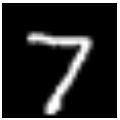

In [30]:
# input image

options(repr.plot.width=1, repr.plot.height=1)
par(mar = c(0.1, 0.1, 0.1, 0.1))
batch[,,,1] %>% as.raster %>% plot

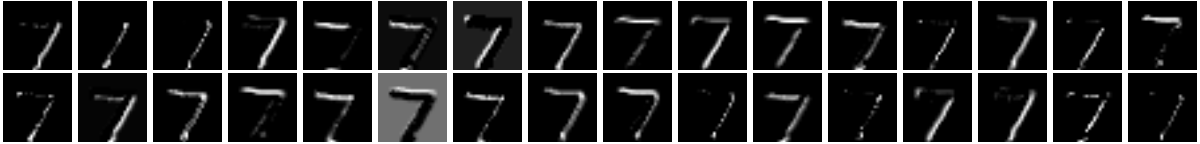

In [31]:
# first convolutional layer (32 feature maps)

options(repr.plot.width=10, repr.plot.height=1.2)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(2,16))

layer = 1

for(i in seq_len(32)){
activations[[layer]][,,,i] %>% range01 %>% as.raster %>% plot
}

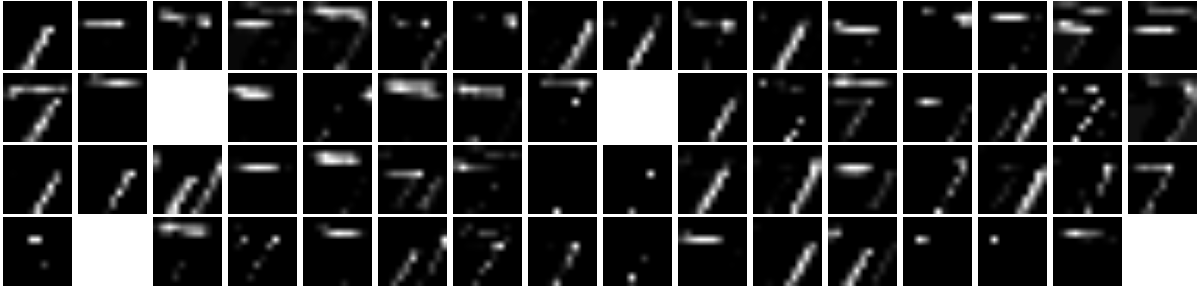

In [32]:
# second convolutional layer (64 feature maps)

options(repr.plot.width=10, repr.plot.height=2.4)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(4,16))

layer = 2

for(i in seq_len(64)){
activations[[layer]][,,,i] %>% range01 %>% as.raster %>% plot
}

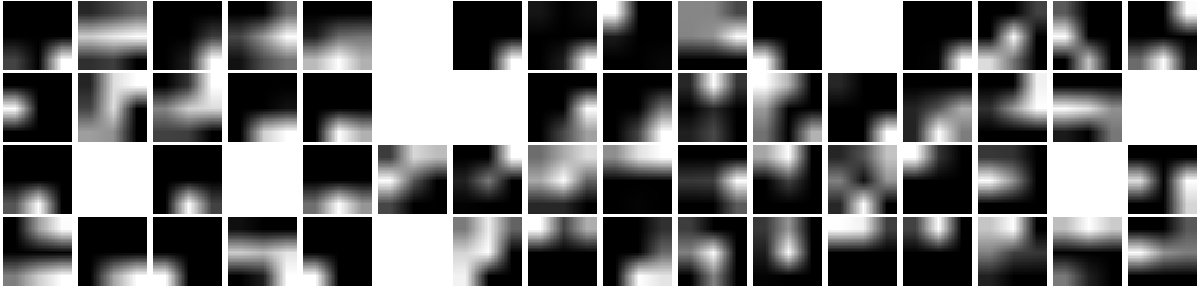

In [33]:
# third convolutional layer (64 feature maps)

options(repr.plot.width=10, repr.plot.height=2.4)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(4,16))

layer = 3

for(i in seq_len(64)){
activations[[layer]][,,,i] %>% range01 %>% as.raster %>% plot
}

## Tip: data augmentation
with small data, it is sometime useful to generate more data by artificially manipulating the data availlable. See how we change the digit 7 with the **keras** functions $\texttt{image}$\_$\texttt{data}$\_$\texttt{generator}$ and $\texttt{flow}$\_$\texttt{images}$\_$\texttt{from}$\_$\texttt{data}$.

In [37]:
batch = array_reshape(test_images[1,,,], c(1, 28, 28, 1))

batch_large = array_reshape(c(batch, batch, batch, batch), c(4, 28, 28, 1))

In [44]:
datagen = image_data_generator(rescale = 1,
                               rotation_range = 90,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = F,
                               fill_mode = "nearest"
                                )

augmentation_generator <- flow_images_from_data(batch_large,
                                                generator = datagen,
                                                batch_size = 4
)

distorted = generator_next(augmentation_generator)

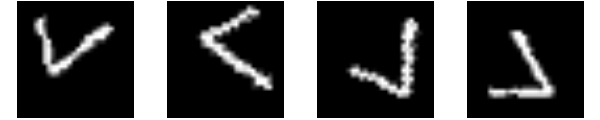

In [45]:
options(repr.plot.width=5, repr.plot.height=1)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(1,4))
for(i in 1:4){
distorted[i,,,1] %>% as.raster %>% plot
}

___
## Convnets for text reckognition
The same properties that make convnets excel at computer vision also make them highly relevant to sequence processing. **Time can be treated as a spatial dimension, like the height or width of a 2D image.** Such 1D convnets can be competitive on certain sequence-processing problems.

The convolution layers we introduced previously were 2D convolutions, extracting 2D patches from image tensors and applying an identical transformation to every patch. In the same way, you can use 1D convolutions, extracting local 1D patches (subsequences)
from sequences

<img src="fig/1d_conv.PNG" width="400">


Recently, 1D convnets, typically used with dilated kernels (dilated means the kernel has a long stride, i.e. it "jumps" along the input instead of sliding), have been used with great success for **audio generation** and **machine translation**.

In [ ]:
max_features <- 10000
max_len <- 500

cat("Loading data...\n")
imdb = dataset_imdb(num_words = max_features)
c(c(x_train, y_train), c(x_test, y_test)) %<-% imdb

cat(length(x_train), "train sequences\n")
cat(length(x_test), "test sequences")
cat("Pad sequences (samples x time)\n")

x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

cat("x_train shape:", dim(x_train), "\n"

1D convnets are structured in the same way as their 2D counterparts: they consist of a stack of $\texttt{layer}$\_$\texttt{conv}$\_$\texttt{1d}$ $\texttt{layer}$\_$\texttt{max}$\_$\texttt{pooling}$\_$\texttt{1d}$, and ending in either a global pooling layer or a $\texttt{layer}$\_$\texttt{flatten}$, that turn the 3D outputs into 2D outputs, allowing you to add one or more dense layers to the model for classification or regression.
One difference, though, is the fact that **you can afford to use larger convolution windows with 1D convnets**. With a 2D convolution layer, a 3 × 3 convolution window contains 3 * 3 = 9 feature vectors; but with a 1D convolution layer, a convolution window of size 3 contains only 3 feature vectors. You can thus easily afford 1D convolution windows of size 7 or 9.

In [48]:
model_cnn_1d = keras_model_sequential() %>%
    layer_embedding(input_dim = max_features,
                    output_dim = 128,
                    input_length = max_len) %>%
    layer_conv_1d(filters = 32,
                  kernel_size = 7,
                  activation = "relu") %>%
    layer_max_pooling_1d(pool_size = 5) %>%
    layer_conv_1d(filters = 32,
                  kernel_size = 7,
                  activation = "relu") %>%
    layer_global_max_pooling_1d() %>%
    layer_dense(units = 1)

summary(model_cnn_1d)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
embedding_1 (Embedding)             (None, 500, 128)                1280000     
________________________________________________________________________________
conv1d_1 (Conv1D)                   (None, 494, 32)                 28704       
________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)      (None, 98, 32)                  0           
________________________________________________________________________________
conv1d_2 (Conv1D)                   (None, 92, 32)                  7200        
________________________________________________________________________________
global_max_pooling1d_1 (GlobalMaxPo (None, 32)                      0           
________________________________________________________________________________
dense_1 (Dense)             

In [ ]:
model_cnn_1d %>% compile(
    optimizer = optimizer_rmsprop(lr = 1e-4), # manually set a very small LR
    loss = "binary_crossentropy", # binary loss function since the problem is dichotomic
    metrics = c("acc") # accuracy metric is fine
)


(history = model_cnn_1d %>% fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
))

In [ ]:
model_cnn_1d %>% evaluate(x_test, y_test)

## About Word Embeddings